# Daily Aggregation of Data

In [2]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *

sc = SparkContext('local')
spark = SparkSession(sc)

In [5]:
%matplotlib inline
import matplotlib
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
path = "./input/clean/training_data/"

In [6]:
NC_data = spark.read.csv(path + "NOAA_NC_DAvg_training_data.csv", header=True, inferSchema=True)
NC_data = NC_data.drop(*[t for t in NC_data.columns if t[-1] == 'T']+['date','CLASS'])
NC_data.show(5)

+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+------------------+
|             ATemp|           MaxTemp|           MinTemp|               RH|            MaxRH|            MinRH|                BP|             MaxBP|             MinBP|              WSpd|              Wdir|            SDWDir|           MaxWSpd|            MinWSpd|             TotPrcp|            TotPAR|           AvgVolt|              Temp|
+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+------------------+-------

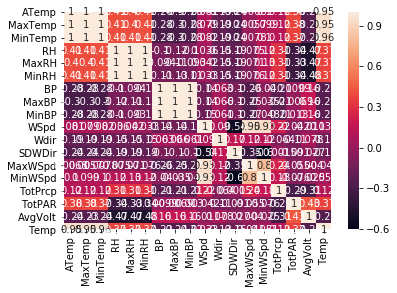

In [9]:
corrmat = NC_data.toPandas().corr()
plt.figsize((9,20))
sns.heatmap(corrmat, annot = True)